In [2]:
pip install pandas matplotlib pymongo

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtainin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [9]:
# initialize
def load_data():
    client = MongoClient("mongodb://localhost:27017/")
    db = client["movie_database"]

    movies = pd.DataFrame(list(db["movie"].find()))
    movie_performance = pd.DataFrame(list(db["movie_performance"].find()))
    users = pd.DataFrame(list(db["users"].find()))
    feature_usage = pd.DataFrame(list(db["feature_usage"].find()))

    return movies, movie_performance, users, feature_usage

In [16]:
movies.head()

,_id,title,director,actors,genre,budget,release_year,imdb_score,description
0,67465f9847aaeaa43a792061,13 Hours,Michael Bay,"[Toby Stephens, James Badge Dale, David Costab...",Action,50000000,2016,7.4,N/A
1,67465f9847aaeaa43a792062,16 Blocks,Richard Donner,"[Bruce Willis, David Zayas, Sasha Roiz]",Action,52000000,2006,6.6,N/A
2,67465f9847aaeaa43a792063,17 Again,Burr Steers,"[Matthew Perry, Hunter Parrish, Thomas Lennon]",Comedy,20000000,2009,6.4,N/A
3,67465f9847aaeaa43a792064,1982,Tommy Oliver,"[Bokeem Woodbine, Ruby Dee, Quinton Aaron]",Drama,1000000,2013,7.1,N/A
4,67465f9847aaeaa43a792065,2 Fast 2 Furious,John Singleton,"[Paul Walker, Cole Hauser, Mo Gallini]",Action,76000000,2003,5.9,N/A


In [17]:
movie_performance.head()

,_id,movie_id,final_box_office,earnings,oscars_and_golden_globes_nominations,oscars_and_golden_globes_awards,performance
0,67465fa047aaeaa43a792fe7,67465f9847aaeaa43a792061,69400000,19400000,0,0,N/A
1,67465fa047aaeaa43a792fe8,67465f9847aaeaa43a792062,65000000,13000000,0,0,N/A
2,67465fa047aaeaa43a792fe9,67465f9847aaeaa43a792063,139000000,119000000,0,0,N/A
3,67465fa047aaeaa43a792fea,67465f9847aaeaa43a792064,2000000,1000000,0,0,N/A
4,67465fa047aaeaa43a792feb,67465f9847aaeaa43a792065,236000000,160000000,0,0,N/A


Log Budget Mean: 7.357770087012289
Log Budget Median: 7.477121269196145
Log Budget Standard Deviation: 0.6174470069402095
Log-transformed correlation between budget and final box office: 0.6992911912817386


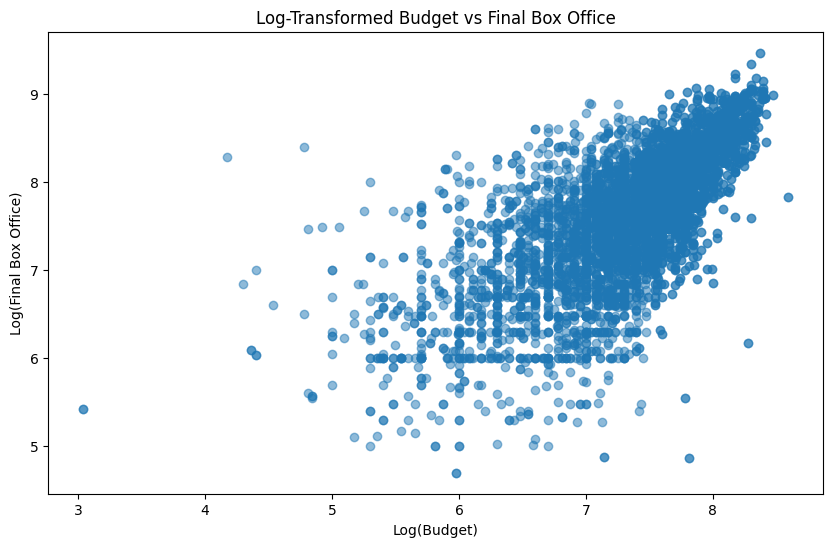

In [27]:

# 预算与票房的关系
merged_df = pd.merge(movies, movie_performance, left_on='_id', right_on='movie_id', how='inner')

# 对 budget 和 final_box_office 进行对数变换
merged_df['log_budget'] = np.log10(merged_df['budget'] + 1)
merged_df['log_final_box_office'] = np.log10(merged_df['final_box_office'] + 1)

#
log_budget_mean = merged_df['log_budget'].mean()
log_budget_median = merged_df['log_budget'].median()
log_budget_std = merged_df['log_budget'].std()
print(f"Log Budget Mean: {log_budget_mean}")
print(f"Log Budget Median: {log_budget_median}")
print(f"Log Budget Standard Deviation: {log_budget_std}")

# 计算对数变换后的相关性
log_correlation = merged_df['log_budget'].corr(merged_df['log_final_box_office'])
print(f"Log-transformed correlation between budget and final box office: {log_correlation}")

# 绘制对数变换后的散点图
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['log_budget'], merged_df['log_final_box_office'], alpha=0.5)
plt.title('Log-Transformed Budget vs Final Box Office')
plt.xlabel('Log(Budget)')
plt.ylabel('Log(Final Box Office)')
plt.show()

In [23]:
merged_df.head()

,_id_x,title,director,actors,genre,budget,release_year,imdb_score,description,_id_y,movie_id,final_box_office,earnings,oscars_and_golden_globes_nominations,oscars_and_golden_globes_awards,performance
0,67465f9847aaeaa43a792061,13 Hours,Michael Bay,"[Toby Stephens, James Badge Dale, David Costab...",Action,50000000,2016,7.4,N/A,67465fa047aaeaa43a792fe7,67465f9847aaeaa43a792061,69400000,19400000,0,0,N/A
1,67465f9847aaeaa43a792061,13 Hours,Michael Bay,"[Toby Stephens, James Badge Dale, David Costab...",Action,50000000,2016,7.4,N/A,6746607447aaeaa43a793872,67465f9847aaeaa43a792061,69400000,19400000,0,0,N/A
2,67465f9847aaeaa43a792062,16 Blocks,Richard Donner,"[Bruce Willis, David Zayas, Sasha Roiz]",Action,52000000,2006,6.6,N/A,67465fa047aaeaa43a792fe8,67465f9847aaeaa43a792062,65000000,13000000,0,0,N/A
3,67465f9847aaeaa43a792062,16 Blocks,Richard Donner,"[Bruce Willis, David Zayas, Sasha Roiz]",Action,52000000,2006,6.6,N/A,6746607447aaeaa43a793873,67465f9847aaeaa43a792062,65000000,13000000,0,0,N/A
4,67465f9847aaeaa43a792063,17 Again,Burr Steers,"[Matthew Perry, Hunter Parrish, Thomas Lennon]",Comedy,20000000,2009,6.4,N/A,67465fa047aaeaa43a792fe9,67465f9847aaeaa43a792063,139000000,119000000,0,0,N/A


In [10]:
def analyze_box_office_vs_budget(movies, movie_performance):
    merged_df = movies.merge(movie_performance, left_on='_id', right_on='movie_id', how='inner')
    merged_df['budget'] = pd.to_numeric(merged_df['budget'], errors='coerce')
    merged_df['final_box_office'] = pd.to_numeric(merged_df['final_box_office'], errors='coerce')
    merged_df.dropna(subset=['budget', 'final_box_office'], inplace=True)

    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['budget'], merged_df['final_box_office'])
    plt.xlabel('Budget')
    plt.ylabel('Box Office Revenue')
    plt.title('Box Office Revenue vs Budget')
    plt.show()

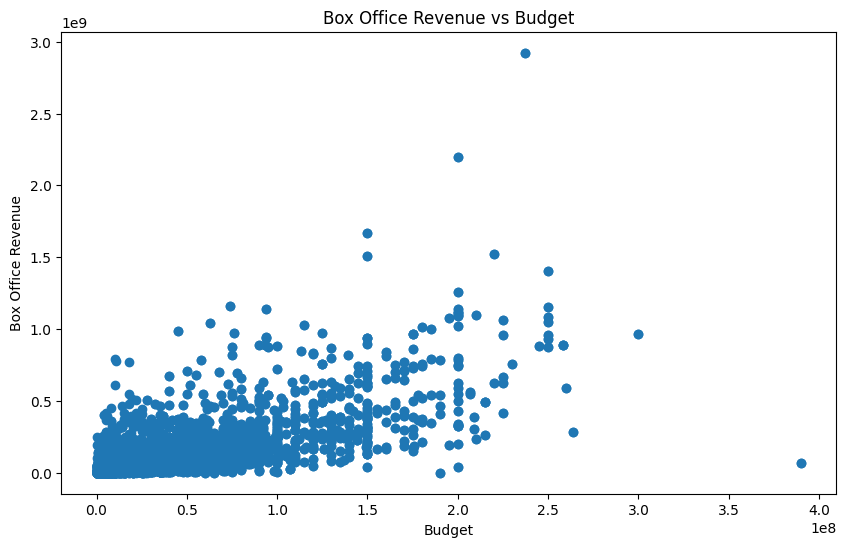

In [11]:
analyze_box_office_vs_budget(movies, movie_performance)